In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import math as m
from scipy.optimize import curve_fit
from scipy.integrate import quad
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

In [2]:
def gaussiana(x,A,mu,sigma):
    return A*np.exp(-((x-mu)**2)/(2*sigma**2))

In [3]:
def par_gauss(Intervalo,df):
    inicio,fin=Intervalo[0],Intervalo[1]
    datos = df[(df["ADC"] >= inicio) & (df["ADC"] <= fin)]
    
    idx_max = datos["I0"].idxmax()
    mu_init = datos.loc[idx_max, "ADC"]
    A_init = datos.loc[idx_max, "I0"]
    sigma_init = (fin - inicio) / 4

    params, pcov= curve_fit(
            gaussiana,
            datos["ADC"].values,
            datos["I0"].values,
            p0=[A_init, mu_init, sigma_init],
            bounds=([0, inicio, 10], [np.inf, fin, fin-inicio])
    )
    return params,pcov, datos["ADC"].values,datos["I0"].values

def toodo_junto(Intervalo,df):
    inicio,fin=Intervalo[0],Intervalo[1]
    datos = df[(df["ADC"] >= inicio) & (df["ADC"] <= fin)]
    
    return datos["ADC"].values,datos["I0"].values


In [4]:
file=open('Atenuación/I1_120_histo.txt', 'r')
text=file.read()
file.close()
print(len(text))

369651


In [5]:
Intervalos_32keV=[(0.54e6,0.6e6),(0.49e6,0.6e6),(0.1e6,0.16e6),(0.1e6,0.19e6),
                  (0.52e6,0.599e6),(0.18e6,0.28e6),(0.52e6,0.59e6),(0.275e6,0.3599e6),
                  (0.13e6,0.2e6),(0.5e6,0.599e6),(0.45e6,0.59e6),(0.52e6,0.6e6)]
juntos=[(0.5e6,1.25e6),(0.49e6,1.25e6),(0.075e6,0.82e6),(0.5e6,1.25e6),(0.165e6,0.93e6),(0.5e6,1.25e6),(0.27e6,1e6),(0.5e6,1.25e6)]
INTENSIDAD=[]

In [6]:
def integral(params, intervalo):
    A,mu,sigma=params[0], params[1],params[2]
    Integral=quad(gaussiana, intervalo[0],  intervalo[1], args=(A,mu,sigma) )
    return Integral

In [7]:
# Lee el archivo ignorando múltiples espacios y tabs
df = pd.read_csv("Atenuación/I0_120_2_histo.txt",  sep='\t', header=None, names=["ADC","I0"])

# Convierte a arreglos de numpy o listas
ADC,I0= toodo_junto(juntos[0],df)


params,pcov,x,y= par_gauss((0.55e6,0.58e6),df)
Integral=integral(params, (0.55e6,0.58e6))
print("Integral es:", Integral)

INTENSIDAD.append(Integral[0])


Integral es: (1447013.3446903508, 1.6065075322150856e-08)


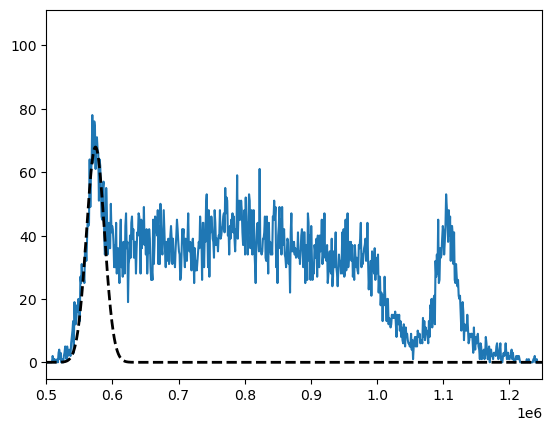

In [8]:
plt.plot(df["ADC"].values,df["I0"].values)
x2=np.linspace(0.50e6,1.25e6,1000)
ajuste=gaussiana(x2,params[0],params[1],params[2])
plt.plot(x2,ajuste, '--', linewidth=2, color="black", label="Ajuste gaussiano")
plt.xlim(0.5e6,1.25e6)
#plt.ylim(0,100)
plt.show()

Integral es: (1101774.4255614984, 1.2232153352015311e-08)


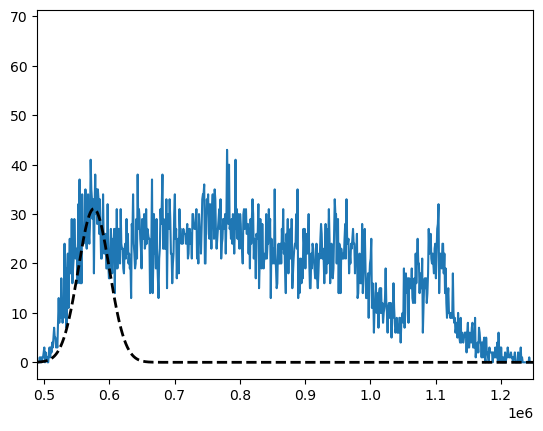

In [9]:
# Lee el archivo ignorando múltiples espacios y tabs
df = pd.read_csv("Atenuación/I1_120_histo.txt", sep='\t', header=None, names=["ADC","I0"])

# Convierte a arreglos de numpy o listas
ADC_1,I1= toodo_junto(juntos[1],df)

params,pcov,x,y= par_gauss((0.56e6,0.6e6),df)
Integral=integral(params, (0.56e6,0.6e6))
print("Integral es:", Integral)

INTENSIDAD.append(Integral[0])

plt.plot(df["ADC"].values,df["I0"].values)

x2=np.linspace(0.49e6,1.3e6,1000)
ajuste=gaussiana(x2,params[0],params[1],params[2])
plt.plot(x2,ajuste, '--', linewidth=2, color="black", label="Ajuste gaussiano")
plt.xlim(0.49e6,1.25e6)
#plt.ylim(0,100)
plt.show()

Integral es: (1401039.7077812424, 1.5554665419928364e-08)


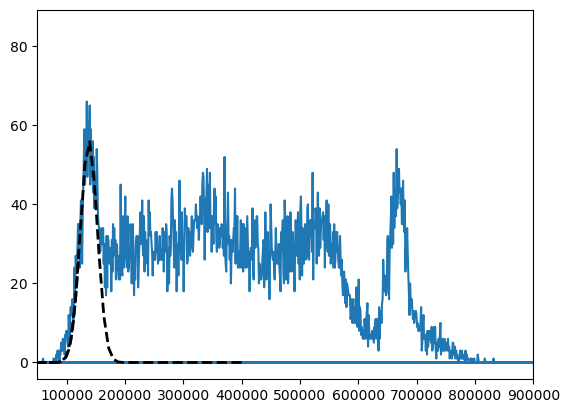

In [10]:
# Lee el archivo ignorando múltiples espacios y tabs
df = pd.read_csv("Atenuación/I2_120_histo.txt", sep='\t', header=None, names=["ADC","I0"])

# Convierte a arreglos de numpy o listas
#ADC_2= df["ADC"].values
#I2=df["I0"].values

ADC_2,I2= toodo_junto(juntos[2],df)

params,pcov,x,y= par_gauss((0.12e6,0.15e6),df)
Integral=integral(params, (0.12e6,0.15e6))
print("Integral es:", Integral)

INTENSIDAD.append(Integral[0])

plt.plot(df["ADC"].values,df["I0"].values)

x2=np.linspace((0.12e6,0.4e6),1000)
ajuste=gaussiana(x2,params[0],params[1],params[2])
plt.plot(x2,ajuste, '--', linewidth=2, color="black", label="Ajuste gaussiano")
plt.xlim(0.05e6,0.9e6)
#plt.ylim(0,100)
plt.show()

Integral es: (2301448.0820802376, 2.555120650704887e-08)


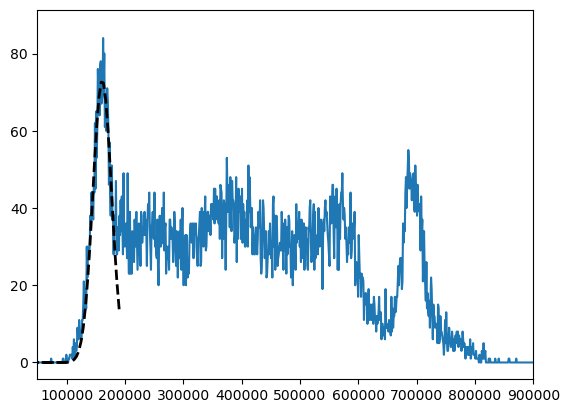

In [11]:
# Lee el archivo ignorando múltiples espacios y tabs
df = pd.read_csv("Atenuación/I3_120_histo.txt",  sep='\t', header=None, names=["ADC","I0"])

params,pcov,x,y= par_gauss((0.14e6,0.18e6),df)
Integral=integral(params,(0.14e6,0.18e6))
print("Integral es:", Integral)

INTENSIDAD.append(Integral[0])

plt.plot(df["ADC"].values,df["I0"].values)

x2=np.linspace((0.1e6,0.19e6),1500)
ajuste=gaussiana(x2,params[0],params[1],params[2])
plt.plot(x2,ajuste, '--', linewidth=2, color="black", label="Ajuste gaussiano")
plt.xlim(0.05e6,0.9e6)
#plt.ylim(0,100)
plt.show()

Integral es: (2451367.2018114077, 2.7215643092619677e-08)


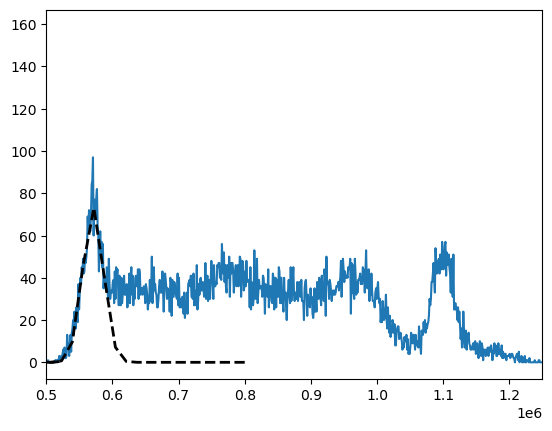

In [12]:
# Lee el archivo ignorando múltiples espacios y tabs
df = pd.read_csv("Atenuación/I4_120_histo.txt",   sep='\t', header=None, names=["ADC","I0"])

ADC_4,I4= toodo_junto(juntos[3],df)

params,pcov,x,y= par_gauss((0.54e6,0.589e6),df)
Integral=integral(params, (0.54e6,0.589e6))
print("Integral es:", Integral)

INTENSIDAD.append(Integral[0])

plt.plot(df["ADC"].values,df["I0"].values)

x2=np.linspace((0.52e6,0.8e6),1500)
ajuste=gaussiana(x2,params[0],params[1],params[2])
plt.plot(x2,ajuste, '--', linewidth=2, color="black", label="Ajuste gaussiano")
plt.xlim(0.5e6,1.25e6)
#plt.ylim(0,100)
plt.show()

Integral es: (1431707.2132554029, 1.5895143126780672e-08)


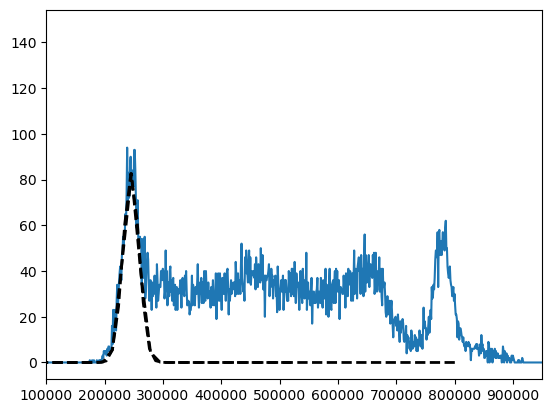

In [13]:
# Lee el archivo ignorando múltiples espacios y tabs
df = pd.read_csv("Atenuación/I6_120_histo.txt", sep='\t', header=None, names=["ADC","I0"])

ADC_5,I5= toodo_junto(juntos[4],df)

params,pcov,x,y= par_gauss((0.23e6,0.25e6),df)
Integral=integral(params, (0.23e6,0.25e6))
print("Integral es:", Integral)

INTENSIDAD.append(Integral[0])

plt.plot(df["ADC"].values,df["I0"].values)

x2=np.linspace((0.52e6,0.8e6),1500)
ajuste=gaussiana(x2,params[0],params[1],params[2])
plt.plot(x2,ajuste, '--', linewidth=2, color="black", label="Ajuste gaussiano")
plt.xlim(0.1e6,0.95e6)
#plt.ylim(0,100)
plt.show()

Integral es: (2656060.211213688, 2.7448936233766663e-05)


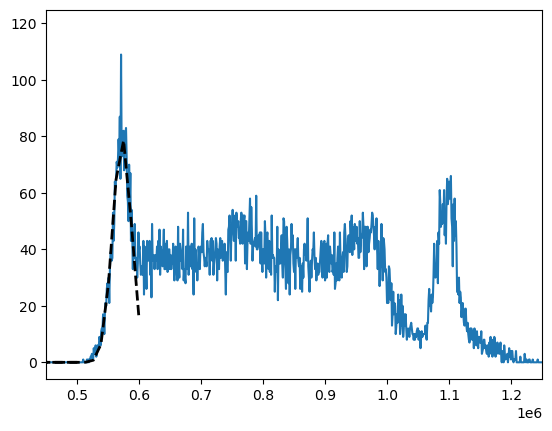

In [14]:
# Lee el archivo ignorando múltiples espacios y tabs
df = pd.read_csv("Atenuación/I7_120_histo.txt", sep='\t', header=None, names=["ADC","I0"])

ADC_6,I6= toodo_junto(juntos[5],df)

params,pcov,x,y= par_gauss((0.53e6,0.59e6),df)
Integral=integral(params, (0.53e6,0.59e6))
print("Integral es:", Integral)

INTENSIDAD.append(Integral[0])

plt.plot(df["ADC"].values,df["I0"].values)

x2=np.linspace((0.5e6,0.599e6),1500)
ajuste=gaussiana(x2,params[0],params[1],params[2])
plt.plot(x2,ajuste, '--', linewidth=2, color="black", label="Ajuste gaussiano")
plt.xlim(0.45e6,1.25e6)
#plt.ylim(0,100)
plt.show()

Integral es: (3019593.6433760608, 0.011702555303364115)


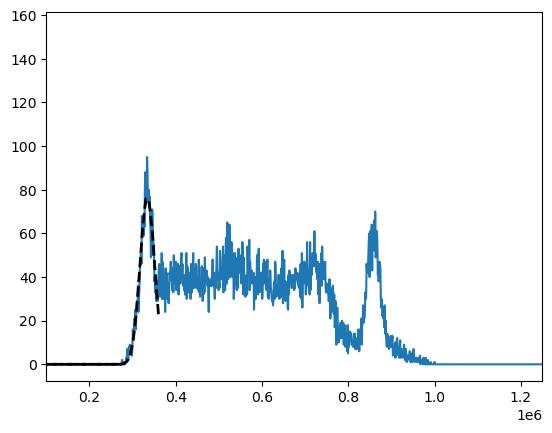

In [15]:
# Lee el archivo ignorando múltiples espacios y tabs
df = pd.read_csv("Atenuación/I8_120_histo.txt",  sep='\t', header=None, names=["ADC","I0"])

ADC_7,I7= toodo_junto(juntos[6],df)

params,pcov,x,y= par_gauss(Intervalos_32keV[7],df)
Integral=integral(params, Intervalos_32keV[7])
print("Integral es:", Integral)

INTENSIDAD.append(Integral[0])

plt.plot(df["ADC"].values,df["I0"].values)

x2=np.linspace(Intervalos_32keV[7],1500)
ajuste=gaussiana(x2,params[0],params[1],params[2])
plt.plot(x2,ajuste, '--', linewidth=2, color="black", label="Ajuste gaussiano")
plt.xlim(0.1e6,1.25e6)
#plt.ylim(0,100)
plt.show()

Integral es: (2933728.985087215, 6.838234843476429e-05)


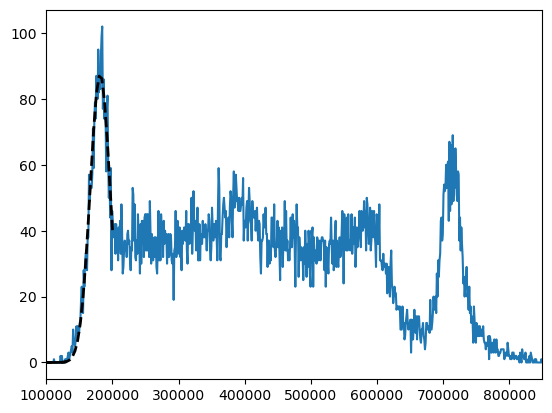

In [16]:
# Lee el archivo ignorando múltiples espacios y tabs
df = pd.read_csv("Atenuación/I9_120_histo.txt",  sep='\t', header=None, names=["ADC","I0"])

params,pcov,x,y= par_gauss(Intervalos_32keV[8],df)
Integral=integral(params, Intervalos_32keV[8])
print("Integral es:", Integral)

INTENSIDAD.append(Integral[0])

plt.plot(df["ADC"].values,df["I0"].values)

x2=np.linspace(Intervalos_32keV[8],1500)
ajuste=gaussiana(x2,params[0],params[1],params[2])
plt.plot(x2,ajuste, '--', linewidth=2, color="black", label="Ajuste gaussiano")
plt.xlim(0.1e6,0.85e6)

plt.show()

Integral es: (3330353.28065536, 0.0009775135891029)


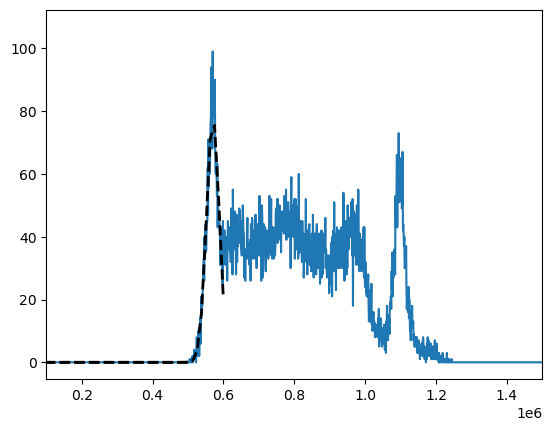

In [17]:
# Lee el archivo ignorando múltiples espacios y tabs
df = pd.read_csv("Atenuación/I10_120_histo.txt", sep='\t', header=None, names=["ADC","I0"])

params,pcov,x,y= par_gauss(Intervalos_32keV[9],df)
Integral=integral(params, Intervalos_32keV[9])
print("Integral es:", Integral)

INTENSIDAD.append(Integral[0])

plt.plot(df["ADC"].values,df["I0"].values)

x2=np.linspace(Intervalos_32keV[9],1500)
ajuste=gaussiana(x2,params[0],params[1],params[2])
plt.plot(x2,ajuste, '--', linewidth=2, color="black", label="Ajuste gaussiano")
plt.xlim(0.1e6,1.5e6)

plt.show()

Integral es: (5320066.176009795, 5.6056464483402844e-05)


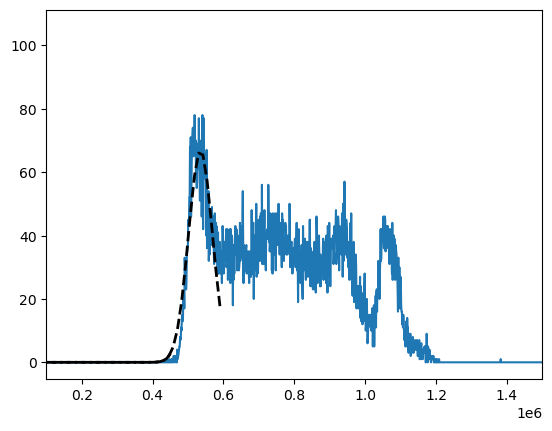

In [18]:
# Lee el archivo ignorando múltiples espacios y tabs
df = pd.read_csv("Atenuación/I11_120_histo.txt", sep='\t', header=None, names=["ADC","I0"])

params,pcov,x,y= par_gauss(Intervalos_32keV[10],df)
Integral=integral(params, Intervalos_32keV[10])
print("Integral es:", Integral)

INTENSIDAD.append(Integral[0])

plt.plot(df["ADC"].values,df["I0"].values)

x2=np.linspace(Intervalos_32keV[10],1500)
ajuste=gaussiana(x2,params[0],params[1],params[2])
plt.plot(x2,ajuste, '--', linewidth=2, color="black", label="Ajuste gaussiano")
plt.xlim(0.1e6,1.5e6)

plt.show()

Integral es: (3597832.9495201525, 0.0056447182739142185)


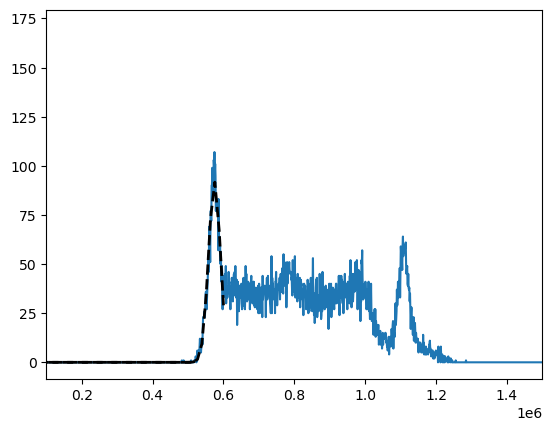

In [19]:
# Lee el archivo ignorando múltiples espacios y tabs
df = pd.read_csv("Atenuación/I12_120_histo.txt", sep='\t', header=None, names=["ADC","I0"])

ADC_U,IU=toodo_junto(juntos[7],df)
params,pcov,x,y= par_gauss(Intervalos_32keV[11],df)
Integral=integral(params, Intervalos_32keV[11])
print("Integral es:", Integral)

INTENSIDAD.append(Integral[0])

plt.plot(df["ADC"].values,df["I0"].values)

x2=np.linspace(Intervalos_32keV[11],1500)
ajuste=gaussiana(x2,params[0],params[1],params[2])
plt.plot(x2,ajuste, '--', linewidth=2, color="black", label="Ajuste gaussiano")
plt.xlim(0.1e6,1.5e6)

plt.show()

In [ ]:
# EVALUACIÓN PRELIMINAR

In [20]:
GROSOR=[0,0.590,0.396,0.198,0.116,0.054,0.070,0.018,0.030,0.016,0.020,0.014]

In [21]:
 ln_I_IO=np.zeros_like(INTENSIDAD)
for i in range(len(INTENSIDAD)):
    ln_I_IO[i]=np.log(INTENSIDAD[i]/INTENSIDAD[0])

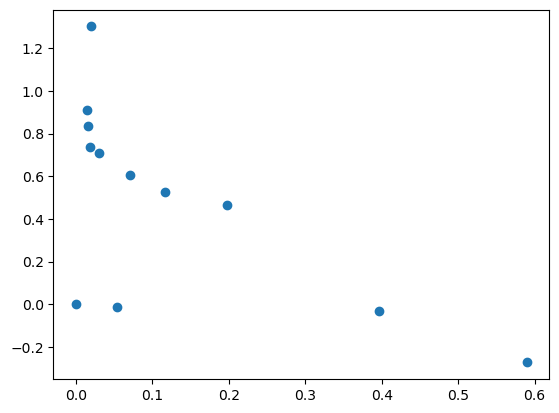

In [23]:
plt.scatter(GROSOR,ln_I_IO)

In [25]:
x1=np.linspace(0.1e6,1.3e6,len(I0))
x2=np.linspace(0.1e6,1.3e6,len(I1))
x3=np.linspace(0.1e6,1.3e6,len(I2))
x4=np.linspace(0.1e6,1.3e6,len(I4))
x5=np.linspace(0.1e6,1.3e6,len(I5))
x6=np.linspace(0.1e6,1.3e6,len(I6))
x7=np.linspace(0.1e6,1.3e6,len(I7))
x8=np.linspace(0.1e6,1.3e6,len(IU))

In [27]:
colores = [
    "#21908C",  # turquesa
    "#FDE725",  # amarillo brillante
    "#440154",  # violeta profundo
    "#3B528B",  # azul intermedio
    "#5DC863",  # verde lima
    "#2C728E",  # azul petróleo
    "#89D548",  # verde brillante
    "#31688E",  # azul océano
    "#35B779",  # verde esmeralda
    "#F8961E",  # naranja cálido
    "#9E0142",  # magenta intenso
    "#F9E721"   # dorado claro
]


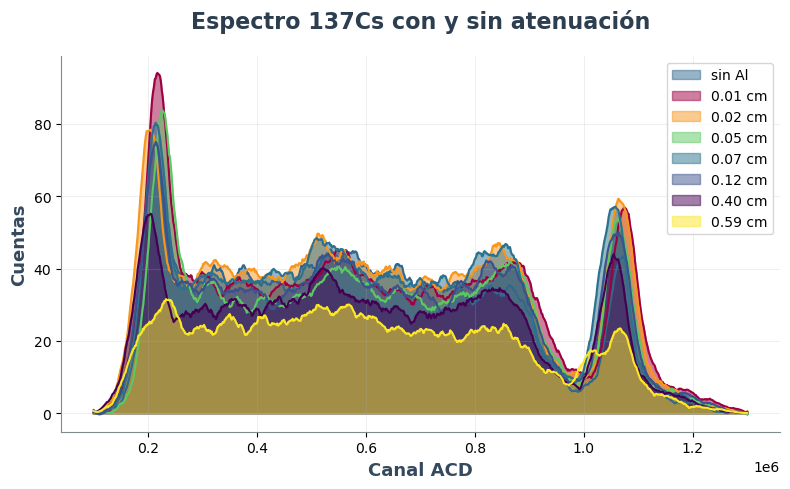

In [29]:
from scipy.signal import savgol_filter

I0_suave = savgol_filter(I0, window_length=31, polyorder=3)
I1_suave = savgol_filter(I1, window_length=31, polyorder=3)
I2_suave = savgol_filter(I2, window_length=31, polyorder=3)
I4_suave = savgol_filter(I4, window_length=31, polyorder=3)
I5_suave = savgol_filter(I5, window_length=31, polyorder=3)
I6_suave = savgol_filter(I6, window_length=31, polyorder=3)
I7_suave = savgol_filter(I7, window_length=31, polyorder=3)
IU_suave = savgol_filter(IU, window_length=31, polyorder=3)

plt.figure(figsize=(8,5))
# Cuadrícula
plt.grid(True, alpha=0.8, linestyle='-', linewidth=0.5)
plt.grid(axis='y', alpha=0.8)

plt.plot(x1, I0_suave,  color=colores[7])
plt.plot(x8, IU_suave,  color=colores[10])
plt.plot(x7, I7_suave, color=colores[9])
plt.plot(x5, I5_suave, color=colores[4])
plt.plot(x6, I6_suave, color=colores[5])
plt.plot(x4, I4_suave, color=colores[3])
plt.plot(x3, I2_suave, color=colores[2])
plt.plot(x2, I1_suave, color=colores[1])

plt.fill_between(x1, I0_suave, color=colores[7], alpha=0.5, label='sin Al')
plt.fill_between(x8, IU_suave, color=colores[10], alpha=0.5, label='%.2f cm' %GROSOR[11])
plt.fill_between(x7, I7_suave, color=colores[9], alpha=0.5, label='%.2f cm' %GROSOR[7])
plt.fill_between(x5, I5_suave, color=colores[4], alpha=0.5, label='%.2f cm' %GROSOR[5])
plt.fill_between(x6, I6_suave, color=colores[5], alpha=0.5, label='%.2f cm' %GROSOR[6])
plt.fill_between(x4, I4_suave, color=colores[3], alpha=0.5, label='%.2f cm' %GROSOR[4])
plt.fill_between(x3, I2_suave, color=colores[2], alpha=0.5, label='%.2f cm' %GROSOR[2])
plt.fill_between(x2, I1_suave, color=colores[1], alpha=0.5, label='%.2f cm' %GROSOR[1])

plt.xlabel('Canal ACD', fontsize=13, fontweight='bold', color="#34495e")
plt.ylabel('Cuentas', fontsize=13, fontweight='bold', color="#34495e")
plt.title('Espectro 137Cs con y sin atenuación',fontsize=16, fontweight='bold', pad=20, color="#2c3e50")

 # Ejes más limpios
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#7f8c8d')
plt.gca().spines['bottom'].set_color('#7f8c8d')


plt.legend(loc="best")
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()